## Data Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

## Target

To predict the rings of each abalone which will lead us to the age of that abalone.

## Importing Libraries

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [237]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [239]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [243]:
df.shape

(4177, 9)

AS we have seen from the above information that only Rings attribute has an int type data

In [245]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [247]:
df.loc[df['Rings'] == ' ']

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [249]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [251]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [253]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

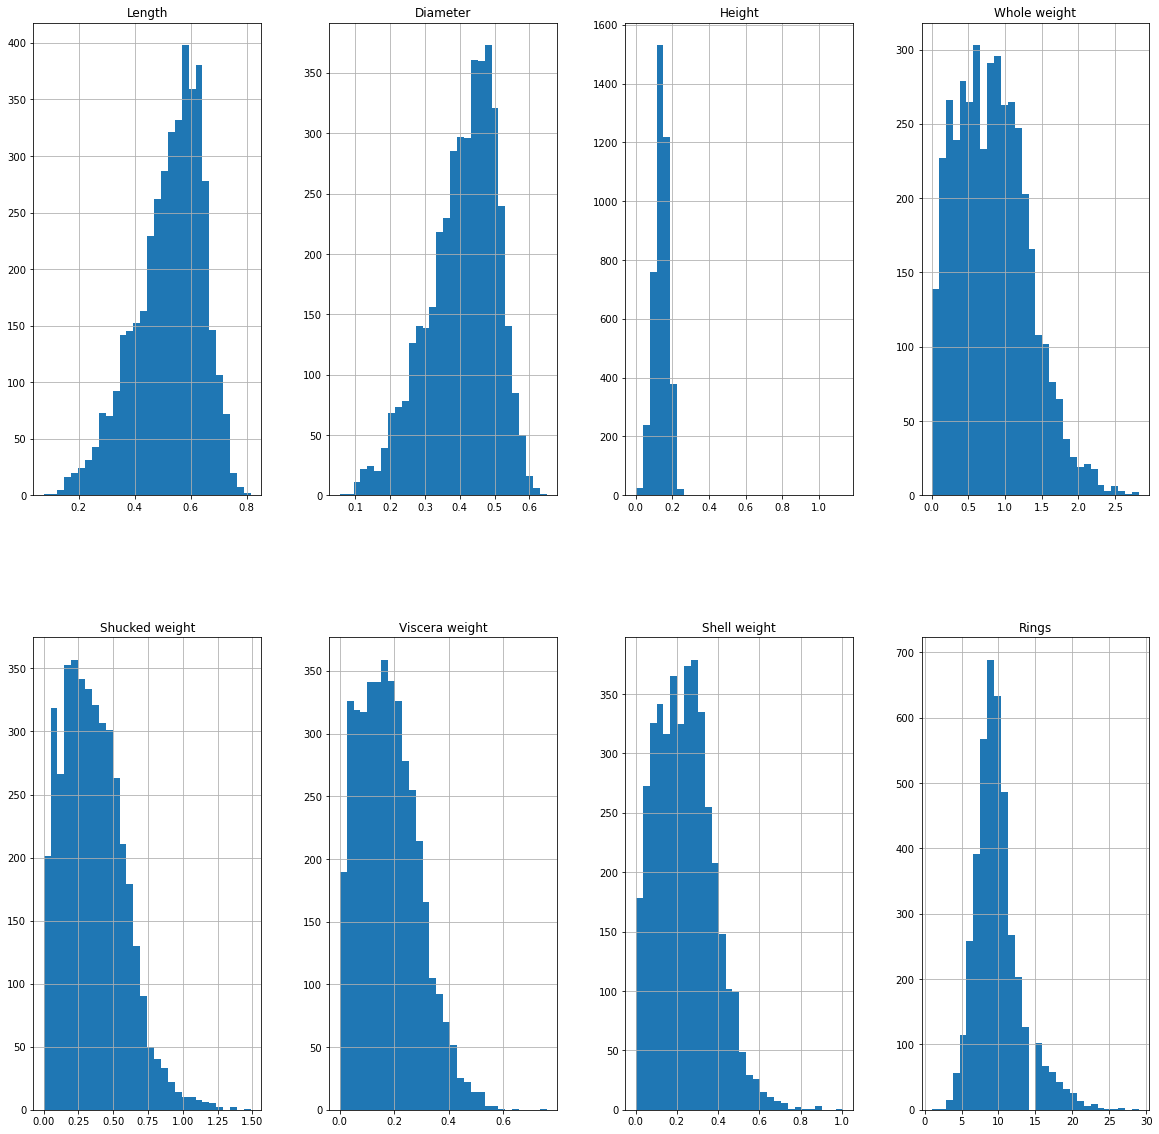

In [255]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

## Correlation

<AxesSubplot:>

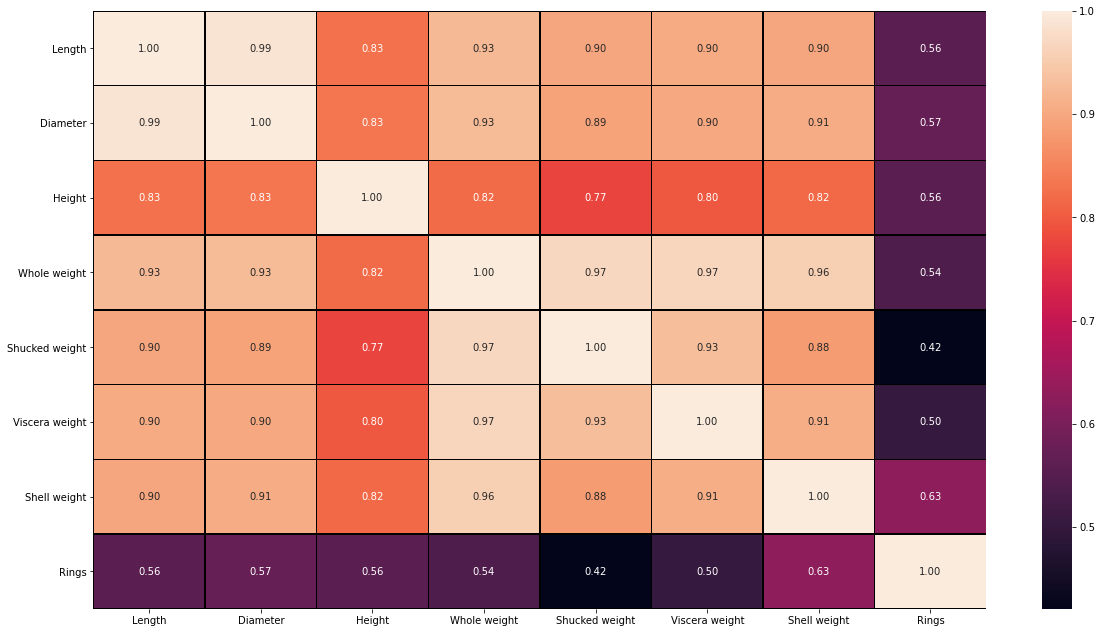

In [257]:
corr = df.corr()
plt.subplots(figsize = (20,11))
sns.heatmap(corr, annot=True ,linewidths = 0.5, linecolor="black", fmt = '0.2f' )


In [259]:
df.corr()['Rings'].sort_values()

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

## Model Visualization

#### Based on Attributes

#### 1.Sex / nominal / -- / M, F, and I (infant)

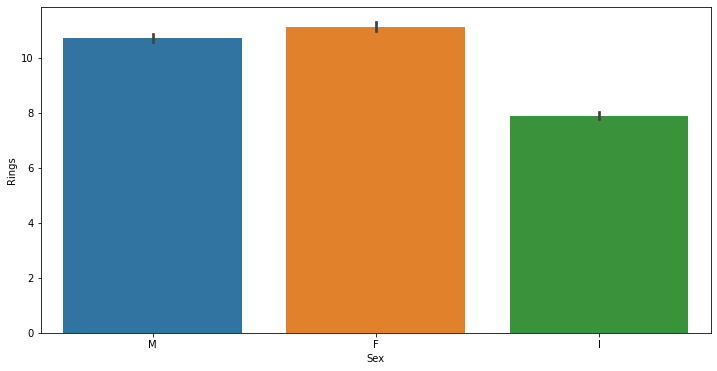

In [261]:
plt.figure(figsize = (12,6))
sns.barplot(df['Sex'], df['Rings'])
plt.show()

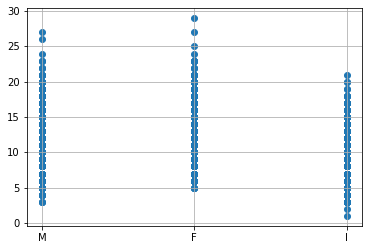

In [263]:
var = 'Sex'
plt.scatter(x = df[var], y = df['Rings'],)
plt.grid(True)

#### 2. Length / continuous / mm / Longest shell measurement

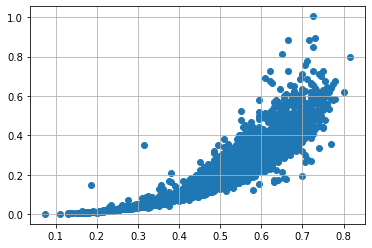

In [265]:
var = 'Length'
plt.scatter(x = df[var], y = df['Shell weight'],)
plt.grid(True)

#### 3. Diameter / continuous / mm / perpendicular to length

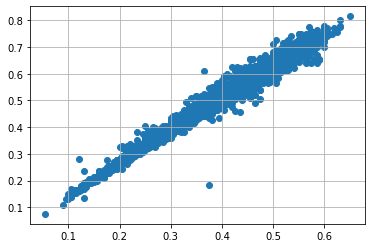

In [267]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['Length'],)
plt.grid(True)

#### 4.Height / continuous / mm / with meat in shell

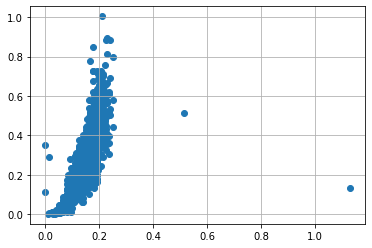

In [269]:
var = 'Height'
plt.scatter(x = df[var], y = df['Shell weight'],)
plt.grid(True)

#### 5. Whole weight / continuous / grams / whole abalone

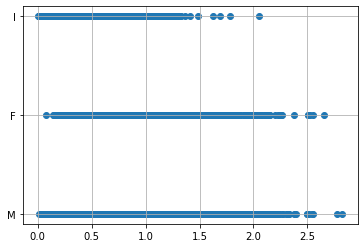

In [271]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['Sex'],)
plt.grid(True)

#### 7.Shucked weight / continuous / grams / weight of meat

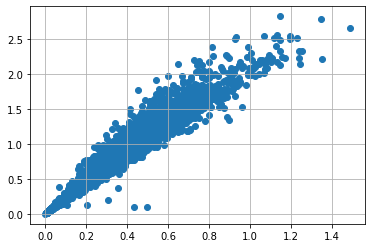

In [273]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['Whole weight'],)
plt.grid(True)

#### 8.Viscera weight / continuous / grams / gut weight (after bleeding)

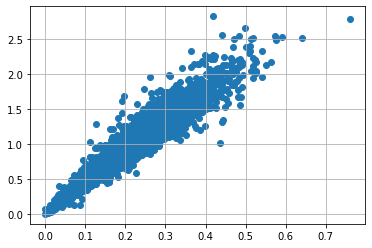

In [275]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['Whole weight'],)
plt.grid(True)

#### 9.Shell weight / continuous / grams / after being dried

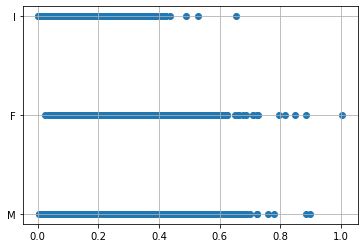

In [277]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['Sex'],)
plt.grid(True)

#### 10.Rings / integer / -- / +1.5 gives the age in years.

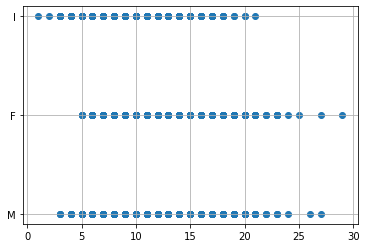

In [279]:
var = 'Rings'
plt.scatter(x = df[var], y = df['Sex'],)
plt.grid(True)

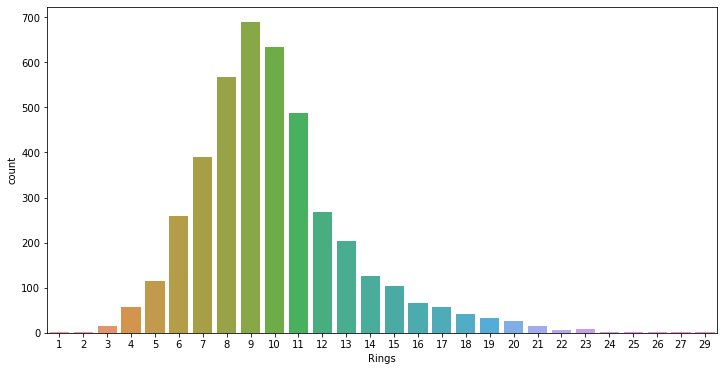

In [281]:
plt.figure(figsize = (12,6))
sns.countplot(df['Rings'])
plt.show()

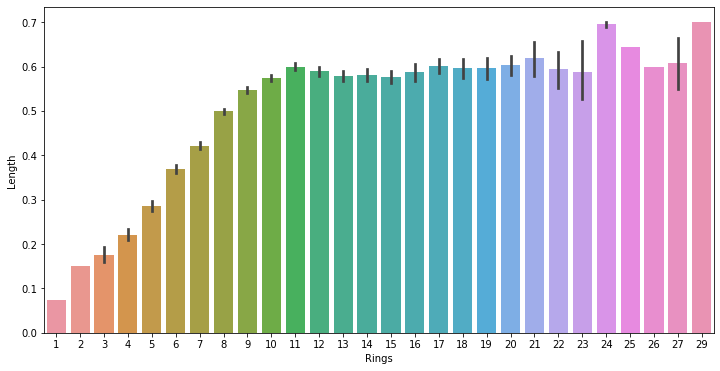

In [283]:
plt.figure(figsize = (12,6))
sns.barplot(df['Rings'], df['Length'])
plt.show()

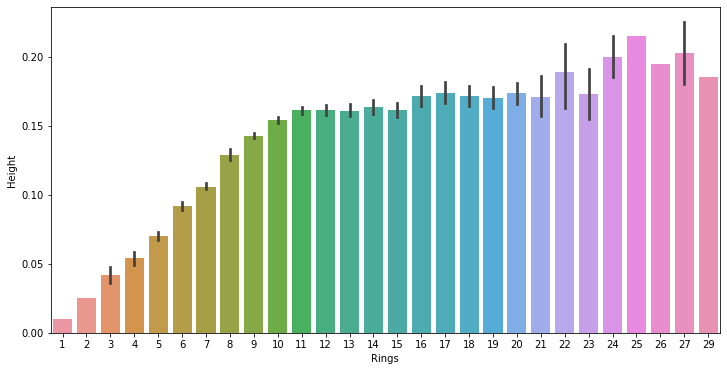

In [285]:
plt.figure(figsize = (12,6))
sns.barplot(df['Rings'], df['Height'])
plt.show()

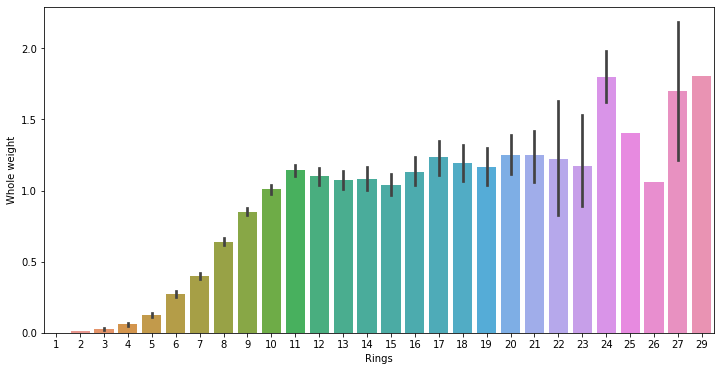

In [287]:
plt.figure(figsize = (12,6))
sns.barplot(df['Rings'], df['Whole weight'])
plt.show()

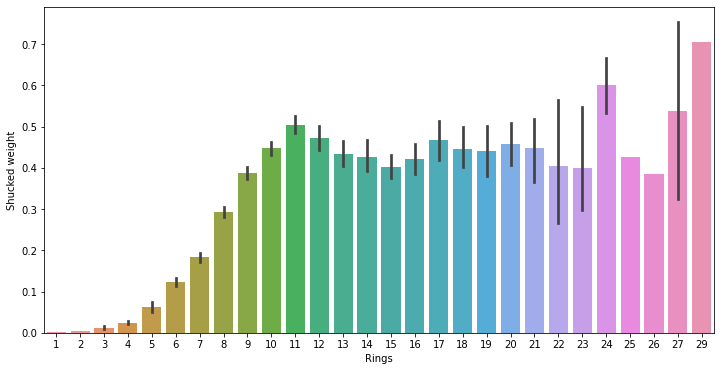

In [289]:
plt.figure(figsize = (12,6))
sns.barplot(df['Rings'], df['Shucked weight'])
plt.show()

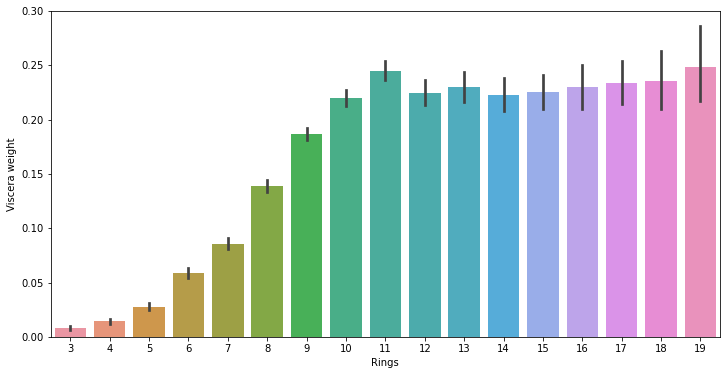

In [291]:
plt.figure(figsize = (12,6))
sns.barplot(df['Rings'], df['Viscera weight'])
plt.show()

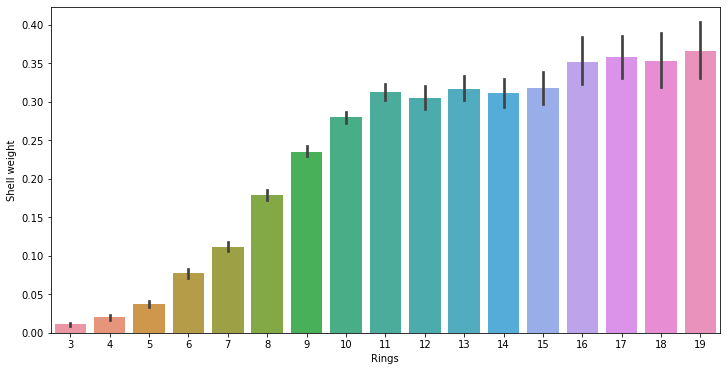

In [293]:
plt.figure(figsize = (12,6))
sns.barplot(df['Rings'], df['Shell weight'])
plt.show()

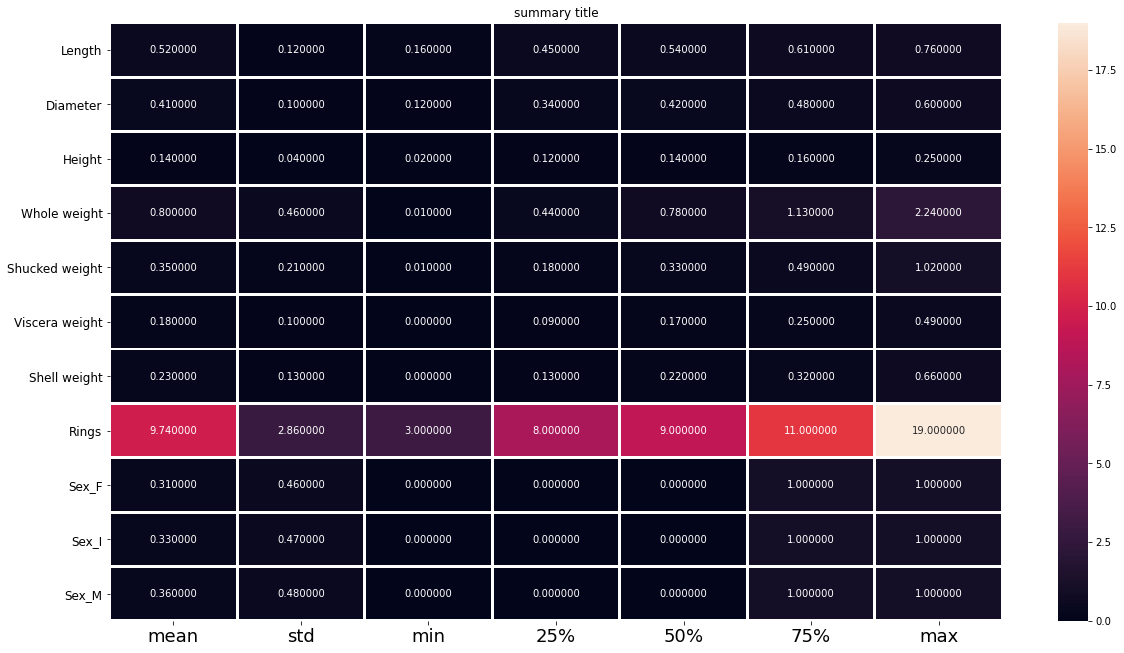

In [295]:
plt.figure(figsize = (20,11))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidths = 2, annot = True,fmt = 'f')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("summary title")
plt.show()

## Encoding

In [297]:
df = pd.get_dummies(df)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


### Checking Outliers

In [299]:
df = pd.get_dummies(df)
dummy_df = df.copy()

<AxesSubplot:>

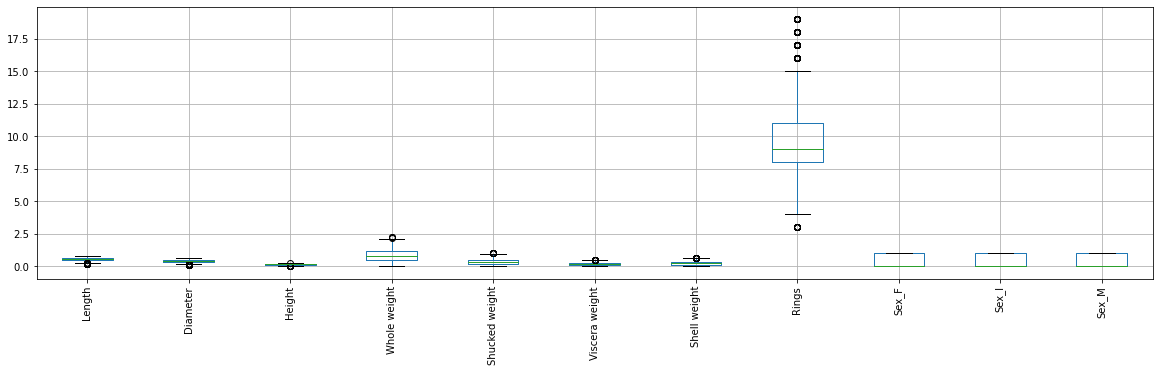

In [301]:
df.boxplot( rot = 90, figsize=(20,5))

In [303]:
df.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Sex_F             0.821149
Sex_I             0.731618
Sex_M             0.576507
dtype: float64

### Outliers Removal

### Z-Score

In [305]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [307]:
df.shape

(3967, 11)

In [309]:
# Percentage of Data Loss

data_loss=(4177-3963)/4177*100 
# 4177 (number of rows in the original dataframe) and 4027 (number of rows after outlier removal)
data_loss

5.123294230308835

## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [311]:
X = df.drop('Rings', axis = 1)
y = df['Rings']

### Variance Inflation Factor(VIF)


In [313]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Features"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         Features   VIF Value
0          Length   38.697172
1        Diameter   40.193105
2          Height    6.677992
3    Whole weight  106.636824
4  Shucked weight   28.381317
5  Viscera weight   17.237724
6    Shell weight   23.180935
7           Sex_F   27.883967
8           Sex_I   26.400001
9           Sex_M   31.438415


In [315]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [317]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1,random_state=21)

### Machine Learning Model for Regression and Evaluation Metrics

In [319]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)


In [321]:
# Support Vector Regression
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, y)

RMSE Score is: 1.966667673333629
R2 Score is: 44.427681646491315
Cross Validation Score: 44.513124771352715
R2 Score - Cross Validation Score is -0.08544312486139916


In [323]:
cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

Cross Validation Score: 46.43575064269989


In [325]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, y)

RMSE Score is: 2.712969132027678
R2 Score is: -5.751433072244327
Cross Validation Score: -13.692538375826047
R2 Score - Cross Validation Score is 7.941105303581719


In [327]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, y)

RMSE Score is: 2.1649195579995557
R2 Score is: 32.65891890147441
Cross Validation Score: 26.237007130084482
R2 Score - Cross Validation Score is 6.421911771389926


In [329]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, y)

RMSE Score is: 2.1672700450073865
R2 Score is: 32.51261299230629
Cross Validation Score: 26.276050904249587
R2 Score - Cross Validation Score is 6.236562088056701


In [331]:
# SGD Regressor

model=SGDRegressor(penalty='l1', max_iter=2000, learning_rate='optimal')
reg(model, X, y)

RMSE Score is: 2.1800112470836894
R2 Score is: 31.716774936790692
Cross Validation Score: 22.37161923780689
R2 Score - Cross Validation Score is 9.345155698983802


In [333]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, y)

RMSE Score is: 2.900100423146448
R2 Score is: -20.843314847544583
Cross Validation Score: -50.358721438531084
R2 Score - Cross Validation Score is 29.5154065909865


In [335]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, y)

RMSE Score is: 2.119146484364519
R2 Score is: 35.476411538396405
Cross Validation Score: 20.892178986774866
R2 Score - Cross Validation Score is 14.58423255162154


In [337]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, y)

RMSE Score is: 1.8825892838956646
R2 Score is: 49.0777340149087
Cross Validation Score: 46.47617767882859
R2 Score - Cross Validation Score is 2.601556336080108


## Hyper parameter tuning

In [339]:
# Choosing Support Vector Regression

fmod_param = {'kernel' : ['poly', 'sigmoid', 'rbf'], 
              'C' : [2.0, 3.0, 4.0], 
              'gamma' : ['scale', 'auto'], 
              'epsilon' : [0.2, 0.3, 0.4]}

In [341]:
GSCV = GridSearchCV(SVR(), fmod_param, cv=5)

In [343]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [2.0, 3.0, 4.0], 'epsilon': [0.2, 0.3, 0.4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf']})

In [345]:
GSCV.best_params_

{'C': 4.0, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}

In [347]:
Final_Model = SVR(C=4.0, epsilon=0.4, gamma='scale', kernel='rbf', shrinking=True)
Classifier = Final_Model.fit(X_train, y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 49.628040090604806


## Features Importance

In [349]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1)

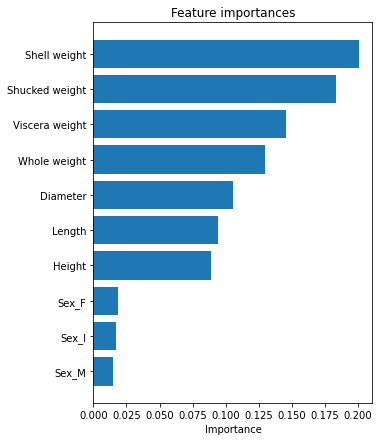

In [350]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [351]:
y_pred=clf.predict(X_test)

In [352]:
print("Decision Tree Classifier report \n",classification_report(y_test, y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           4       0.20      0.33      0.25         3
           5       0.29      0.20      0.24        10
           6       0.20      0.13      0.16        23
           7       0.31      0.28      0.29        40
           8       0.21      0.31      0.25        49
           9       0.17      0.17      0.17        69
          10       0.28      0.23      0.25        69
          11       0.26      0.25      0.25        52
          12       0.09      0.07      0.08        30
          13       0.15      0.20      0.17        20
          14       0.10      0.12      0.11         8
          15       0.11      0.11      0.11         9
          16       0.14      0.14      0.14         7
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         3

    accuracy                           0.21       397
   macro avg       0.17      0.17      0.17   

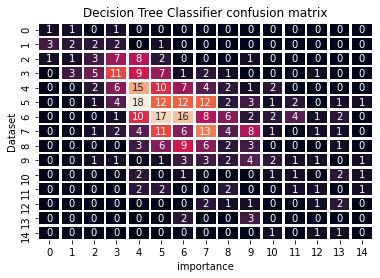

In [353]:
cfm=confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=1.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('Dataset')
plt.xlabel('importance');

## Model saving

In [354]:
import pickle
filename = 'inhouse_abalone-study.pkl'
pickle.dump(cfm, open(filename, 'wb'))